In [1]:
from mpl_toolkits.basemap import Basemap, cm, shiftgrid,maskoceans
from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy.ma as ma
from scipy.interpolate import griddata
from pyresample import geometry,image, kd_tree
import mycolorbars


In [3]:
## Scatter plot for showing the correlation btw env factor and wetland CH4 emission.
## Historical
# Get N
#nclu=NetCDFFile('hist_01_10.nc','r')
nclu=NetCDFFile('hist_01_10_n2o.nc','r')
ncvar_n2o = nclu.variables['n2o'][:]
latnc = nclu.variables['lat'][:]
lonnc = nclu.variables['lon'][:]
lonnc = ((lonnc - 180) % 360) - 180

# Get Environmental factors (Tair and Precip)
#nclu_env=NetCDFFile('hist_01_10_env.nc','r')
nclu_env=NetCDFFile('hist_01_10_n2o_env.nc','r')
ncvar_temp = nclu_env.variables['tavg_avg_yr'][:]
ncvar_prec = nclu_env.variables['precip_avg_yr'][:]
ncvar_wliq = nclu_env.variables['sm_1_5_avg_yr'][:]

## Future scenarios
#nclu2=NetCDFFile('rcp45_91_00.nc','r')
nclu2=NetCDFFile('rcp45_91_00_n2o.nc','r')
ncvar2_n2o = nclu2.variables['n2o'][:]

#nclu_env2=NetCDFFile('rcp45_91_00_env.nc','r')
nclu_env2=NetCDFFile('rcp45_91_00_n2o_env.nc','r')
ncvar2_temp = nclu_env2.variables['tavg_avg_yr'][:]
ncvar2_prec = nclu_env2.variables['precip_avg_yr'][:]
ncvar2_wliq = nclu_env2.variables['sm_1_5_avg_yr'][:]

nclu3=NetCDFFile('rcp85_91_00_n2o.nc','r')
ncvar3_n2o = nclu3.variables['n2o'][:]

nclu_env3=NetCDFFile('rcp85_91_00_n2o_env.nc','r')
ncvar3_temp = nclu_env3.variables['tavg_avg_yr'][:]
ncvar3_prec = nclu_env3.variables['precip_avg_yr'][:]
ncvar3_wliq = nclu_env3.variables['sm_1_5_avg_yr'][:]

# Mask out regions outside the CONUS
ncmk=NetCDFFile('surfdata_05x05_13reg.nc','r')
ncvar_mask = ncmk.variables['REGION_MASK_CRU_NCEP'][:]


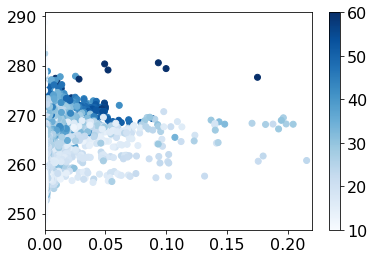

In [10]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(ncvar_n2o*1000, ncvar_temp, c=ncvar_wliq*100, vmin=10, vmax=60, cmap=plt.cm.Blues)
plt.xlim([0,0.22])
plt.colorbar()
plt.show()

In [12]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(ncvar_n2o*1000, ncvar_wliq*100, c=ncvar_temp, vmin=250, vmax=280, cmap=plt.cm.Reds)
plt.xlim([0,0.22])
plt.colorbar()
#plt.show()
plt.savefig('n2o_vs_sm.png')

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(ncvar_wetland, fw, c=ncvar_prec, vmin=0, vmax=700, cmap=plt.cm.Blues)
plt.colorbar()
plt.show()
#plt.savefig('figs5b.png')

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(ncvar_wetland, fw, c=ncvar_temp, vmin=250, vmax=280, cmap=plt.cm.Blues)
plt.colorbar()
plt.show()
#plt.savefig('figs5a.png')

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(ncvar_nonwtld[ncvar_nonwtld<1.0], ncvar_wliq[ncvar_nonwtld<1.0]*100, c=ncvar_temp[ncvar_nonwtld<1.0], vmin=250, vmax=280, cmap=plt.cm.Reds)
plt.xlim([-3,3])
plt.axvline(x=0.0)
plt.colorbar()
#plt.show()
plt.savefig('nonwetlandch4_vs_sm_ctemp.jpg')

In [ ]:
# The following cells are for analyzing the RCP4.5 projection.
diff_wetland = ncvar2_wetland - ncvar_wetland
diff_nonwtld = ncvar2_nonwtld - ncvar_nonwtld
diff_wetland_prod = ncvar2_wetland_prod - ncvar_wetland_prod
diff_fw = fw2 - fw
diff_temp = ncvar2_temp - ncvar_temp
diff_prec = ncvar2_prec - ncvar_prec
diff_wliq = ncvar2_wliq - ncvar_wliq

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(diff_wetland, diff_fw, c=diff_temp, vmin=1, vmax=2.5, cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(diff_wetland[abs(ncvar2_wetland)>0.3], diff_temp[abs(ncvar2_wetland)>0.3])  #, c=diff_temp, vmin=-0.1, vmax=0.1, cmap=plt.cm.Reds)
#plt.colorbar()
plt.show()

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(diff_wetland, diff_prec)  #, c=diff_temp, vmin=-0.1, vmax=0.1, cmap=plt.cm.Reds)
#plt.colorbar()
plt.show()

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(diff_nonwtld, diff_wliq)  #, c=diff_temp, vmin=-0.1, vmax=0.1, cmap=plt.cm.Reds)
#plt.colorbar()
plt.show()

In [ ]:
# The following cells are for analyzing the RCP8.5 projection.
diff_wetland = ncvar3_wetland - ncvar_wetland
diff_nonwtld = ncvar3_nonwtld - ncvar_nonwtld
diff_wetland_prod = ncvar3_wetland_prod - ncvar_wetland_prod
diff_fw = fw3 - fw
diff_temp = ncvar3_temp - ncvar_temp
diff_prec = ncvar3_prec - ncvar_prec
diff_wliq = ncvar3_wliq - ncvar_wliq

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(diff_wetland, diff_fw, c=diff_temp, vmin=3, vmax=6, cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(diff_wetland, diff_wetland_prod)  #, c=diff_temp, vmin=-0.1, vmax=0.1, cmap=plt.cm.Reds)
#plt.colorbar()
plt.show()

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(diff_wetland, diff_prec)  #, c=diff_temp, vmin=-0.1, vmax=0.1, cmap=plt.cm.Reds)
#plt.colorbar()
plt.show()

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(diff_nonwtld, diff_wliq)  #, c=diff_temp, vmin=-0.1, vmax=0.1, cmap=plt.cm.Reds)
#plt.colorbar()
plt.show()

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(ncvar3_nonwtld, ncvar3_wliq, c=ncvar3_temp, vmin=260, vmax=300, cmap=plt.cm.Reds)
#plt.colorbar()
plt.show()